<a href="https://colab.research.google.com/github/hehersonrenales/sales-predictions/blob/main/Sales_Prediction_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Google Drive

Read CSV file with Pandas and assign to a variable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(filepath)

# Dataframe Head, Shape, and Data Types

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Duplicated Data Checking

In [ ]:
df.duplicated().any()

False

# Missing Values Checking

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Checking what year has missing values
outletcount = df.groupby('Outlet_Establishment_Year')['Outlet_Size'].count()
outletcount

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998       0
1999     930
2002       0
2004     930
2007       0
2009     928
Name: Outlet_Size, dtype: int64

In [ ]:
# Missing value 'High' in Outlet_Size disappears after 1987. Filling up with 'High' data for missing values in Outlet_Size
outletyearcount = df.groupby(['Outlet_Establishment_Year','Outlet_Size']).count()
outletyearcount

Item_Identifier  Item_Weight  \
Outlet_Establishment_Year Outlet_Size                                 
1985                      Medium                   935            0   
                          Small                    528            0   
1987                      High                     932          932   
1997                      Small                    930          930   
1999                      Medium                   930          930   
2004                      Small                    930          930   
2009                      Medium                   928          928   

                                       Item_Fat_Content  Item_Visibility  \
Outlet_Establishment_Year Outlet_Size                                      
1985                      Medium                    935              935   
                          Small                     528              528   
1987                      High                      932              932   
1997                      Small                     930              930   
1999                      Medium                    930              930   
2004                      Small                     930              930   
2009                      Medium                    928              928   

                                       Item_Type  Item_MRP  Outlet_Identifier  \
Outlet_Establishment_Year Outlet_Size                                           
1985                      Medium             935       935                935   
                          Small              528       528                528   
1987                      High               932       932                932   
1997                      Small              930       930                930   
1999                      Medium             930       930                930   
2004                      Small              930       930                930   
2009                      Medium             928       928                928   

                                       Outlet_Location_Type  Outlet_Type  \
Outlet_Establishment_Year Outlet_Size                                      
1985                      Medium                        935          935   
                          Small                         528          528   
1987                      High                          932          932   
1997                      Small                         930          930   
1999                      Medium                        930          930   
2004                      Small                         930          930   
2009                      Medium                        928          928   

                                       Item_Outlet_Sales  
Outlet_Establishment_Year Outlet_Size                     
1985                      Medium                     935  
                          Small                      528  
1987                      High                       932  
1997                      Small                      930  
1999                      Medium                     930  
2004                      Small                      930  
2009                      Medium                     928

# Filling Missing Value

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('High')
df['Item_Weight'] = df['Item_Weight'].interpolate(method = 'linear')
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Finding Inconsistent Data

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,High,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Found inconsistencies in 'Item_Fat_Content' where some data for 'Low Fat' and 'Regular' was entered as 'LF', 'low fat' and 'reg'
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Corrected inconsistencis in 'Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Statistics

In [ ]:
df[['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.066132,140.992782,2181.288914
std,4.445074,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.000000,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.600000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


#Visualization

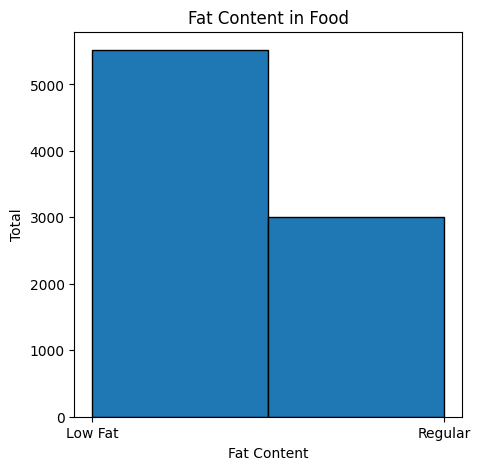

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(df['Item_Fat_Content'],bins=2,edgecolor="black");
ax.set_xlabel('Fat Content')
ax.set_ylabel('Total')
ax.set_title('Fat Content in Food');

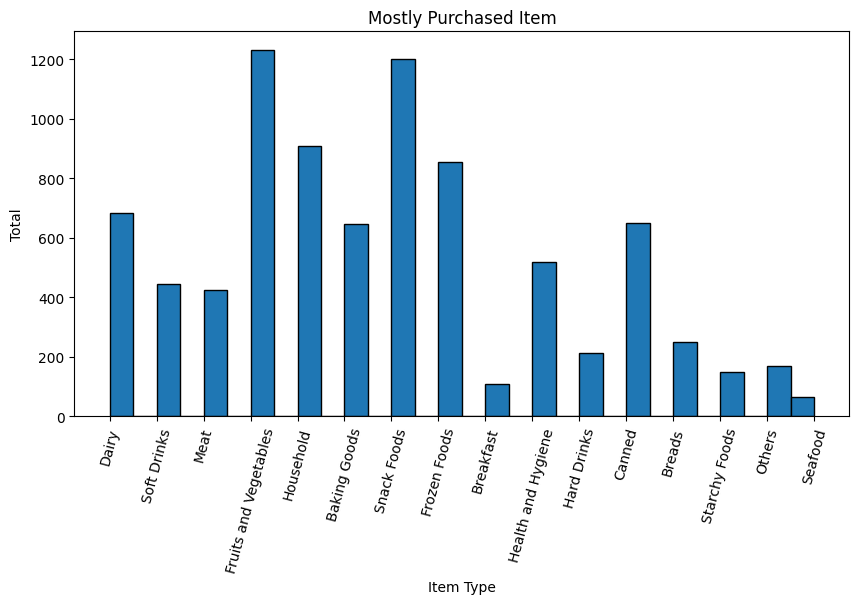

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.hist(df['Item_Type'],bins=30,edgecolor='black');
ax.set_xlabel('Item Type')
ax.set_ylabel('Total')
ax.set_title('Mostly Purchased Item');
plt.xticks(rotation=75);

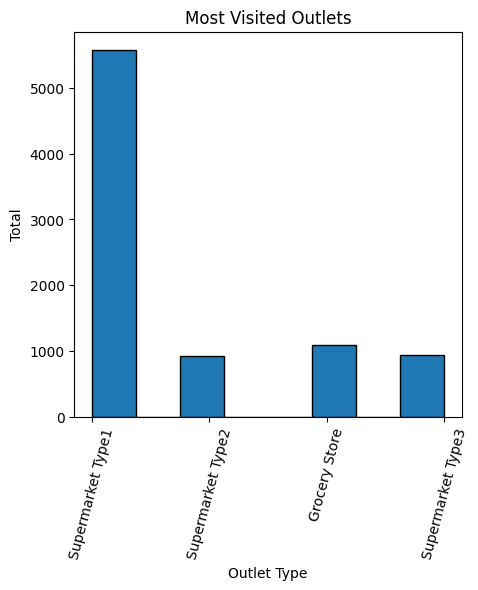

In [ ]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(df['Outlet_Type'],bins=8,edgecolor='black');
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Total')
ax.set_title('Most Visited Outlets');
plt.xticks(rotation=75);

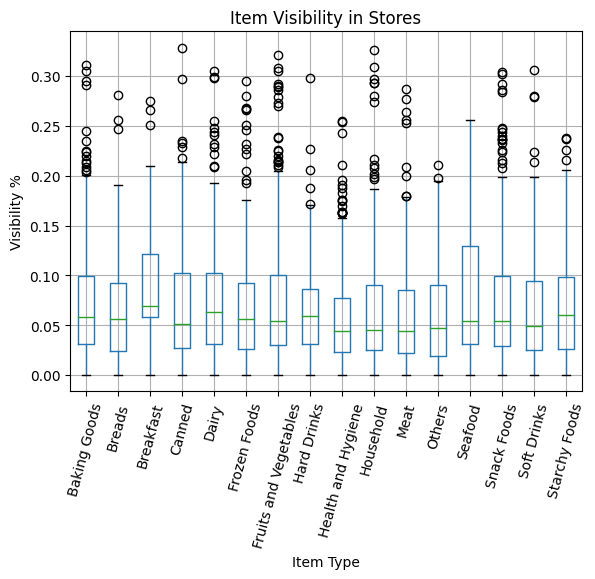

In [ ]:

ax = df.boxplot(by='Item_Type', column ='Item_Visibility', grid=True);
plt.xticks(rotation=75);
plt.suptitle('')
ax.set_xlabel('Item Type')
ax.set_ylabel('Visibility %')
ax.set_title('Item Visibility in Stores');

<ipython-input-40-cae981dd2f8c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr();


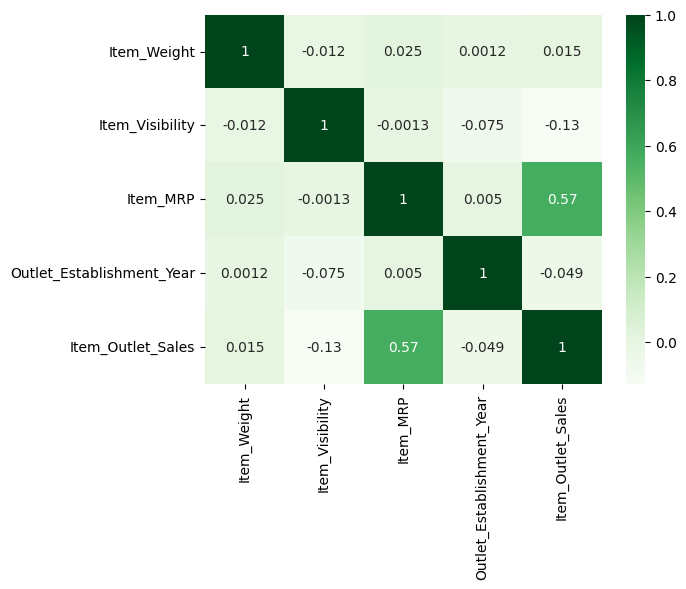

In [ ]:
corr = df.corr();
sns.heatmap(corr, cmap='Greens', annot=True);